# Machine Learning Approaches for News Analysis

By: Michael Vella

The scope of this workbook is to use Support Vector Machine (SVM) model on the features extracted from the two data sets provided, police press releases and news articles.

Dataset used : `data_post_eda.csv`


## SVM in our context:
- Will be focusing on the classification of fatal vs. non-fatal accidents.

## 1. Introduction to the technique

### 1.1 Theory

to-do

### 1.2 Suitability

to-do

## 2. Preprocessing

### 2.1 Installing Packages

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn

### 2.2 Imports

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import display
import warnings

warnings.filterwarnings('ignore')

### 2.3 Variables

In [ ]:
data_folder = "../../../data"
final_data_folder = f"{data_folder}/final"

data_csv = f"{final_data_folder}/data_post_eda.csv"

### 2.4 Dataset preparation

In [ ]:
df = pd.read_csv(data_csv)

print(f"Dataset shape: {df.shape}")
print(f"Column names: {df.columns.tolist()}")
print(f"Dataset info:")
display(df.info())

## 3. Hyperparameter Tuning

### 3.1 to-do

## 4. Model Training

## 5. Evaluation

## 6. Interpretation

## 7. Limitations and ethical considerations

In [ ]:
accident_time_categories_df = pd.get_dummies(df["accident_time_category"], drop_first=True, dtype=int)
accident_time_categories_df

In [ ]:
street_type_categories_df = pd.get_dummies(df["street_type"], drop_first=True, dtype=int)
street_type_categories_df

In [ ]:
region_categories_df = pd.get_dummies(df["region"], drop_first=True, dtype=int)
region_categories_df

In [36]:
final_df = df[[
    "num_drivers_under_18",
    "num_drivers_18_to_24",
    "num_drivers_25_to_49",
    "num_drivers_50_to_64",
    "num_drivers_65_plus",
    "num_drivers_age_unknown",
    "num_drivers_male",
    "num_drivers_female",
    "num_drivers_gender_unknown",
    "num_vehicle_unknown",
    "num_vehicle_pedestrian",
    "num_vehicle_bicycle",
    "num_vehicle_motorbike",
    "num_vehicle_car",
    "num_vehicle_van",
    "num_vehicle_bus",
    "is_weekend",
    "is_school_holiday_mt", # select only this as it is correleated with public holiday/school day booleans
    "temperature_mean", # select only this as highly correleated with other temperature columns
    "is_raining",
    "is_fatal", # target variable
]].join(
    accident_time_categories_df
).join(
    street_type_categories_df
).join(
    region_categories_df
)

final_df["is_weekend"] = final_df['is_weekend'].astype(int)
final_df["is_school_holiday_mt"] = final_df['is_school_holiday_mt'].astype(int)
final_df["is_raining"] = final_df['is_raining'].astype(int)

print("DataFrame before scaling:")
display(final_df)

columns_to_scale = [
    "num_drivers_under_18",
    "num_drivers_18_to_24",
    "num_drivers_25_to_49",
    "num_drivers_50_to_64",
    "num_drivers_65_plus",
    "num_drivers_age_unknown",
    "num_drivers_male",
    "num_drivers_female",
    "num_drivers_gender_unknown",
    "num_vehicle_unknown",
    "num_vehicle_pedestrian",
    "num_vehicle_bicycle",
    "num_vehicle_motorbike",
    "num_vehicle_car",
    "num_vehicle_van",
    "num_vehicle_bus",
    "temperature_mean",
]

scaler = StandardScaler()
final_df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print("DataFrame after scaling:")
display(final_df)

print("Dataset information:")    
final_df.info()

DataFrame before scaling:


,num_drivers_under_18,num_drivers_18_to_24,num_drivers_25_to_49,num_drivers_50_to_64,num_drivers_65_plus,num_drivers_age_unknown,num_drivers_male,num_drivers_female,num_drivers_gender_unknown,num_vehicle_unknown,...,night,primary,residential,secondary,tertiary,trunk,Gozo,Northern,South Eastern,Southern Harbour
8,0,0,0,0,0,1,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
9,0,0,1,0,0,1,2,0,0,0,...,1,0,1,0,0,0,0,1,0,0
10,0,0,0,0,1,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
11,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
12,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,0,0,0,0,2,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
215,0,0,0,0,0,2,0,0,2,0,...,1,0,0,0,0,0,0,0,0,1
216,0,0,0,1,1,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
217,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


DataFrame after scaling:


,num_drivers_under_18,num_drivers_18_to_24,num_drivers_25_to_49,num_drivers_50_to_64,num_drivers_65_plus,num_drivers_age_unknown,num_drivers_male,num_drivers_female,num_drivers_gender_unknown,num_vehicle_unknown,...,night,primary,residential,secondary,tertiary,trunk,Gozo,Northern,South Eastern,Southern Harbour
8,-0.198517,-0.462876,-0.977677,-0.535974,-0.452432,1.706497,-1.530428,1.304785,-0.466381,-0.097823,...,1,1,0,0,0,0,0,0,0,0
9,-0.198517,-0.462876,0.344694,-0.535974,-0.452432,1.706497,1.253368,-0.607087,-0.466381,-0.097823,...,1,0,1,0,0,0,0,1,0,0
10,-0.198517,-0.462876,-0.977677,-0.535974,1.717184,1.706497,-0.138530,-0.607087,1.463156,-0.097823,...,0,0,0,0,0,1,0,1,0,0
11,-0.198517,-0.462876,0.344694,-0.535974,-0.452432,-0.411567,-1.530428,1.304785,-0.466381,-0.097823,...,0,0,1,0,0,0,0,1,0,0
12,-0.198517,-0.462876,-0.977677,1.448070,-0.452432,-0.411567,-0.138530,-0.607087,-0.466381,-0.097823,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,-0.198517,-0.462876,-0.977677,-0.535974,3.886800,-0.411567,-0.138530,1.304785,-0.466381,-0.097823,...,0,0,1,0,0,0,0,1,0,0
215,-0.198517,-0.462876,-0.977677,-0.535974,-0.452432,3.824561,-1.530428,-0.607087,3.392694,-0.097823,...,1,0,0,0,0,0,0,0,0,1
216,-0.198517,-0.462876,-0.977677,1.448070,1.717184,-0.411567,-0.138530,1.304785,-0.466381,-0.097823,...,0,1,0,0,0,0,0,0,1,0
217,-0.198517,-0.462876,-0.977677,-0.535974,-0.452432,1.706497,-1.530428,-0.607087,1.463156,-0.097823,...,0,0,0,0,0,1,0,0,0,1


Dataset information:
<class 'pandas.core.frame.DataFrame'>
Index: 211 entries, 8 to 218
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   num_drivers_under_18        211 non-null    float64
 1   num_drivers_18_to_24        211 non-null    float64
 2   num_drivers_25_to_49        211 non-null    float64
 3   num_drivers_50_to_64        211 non-null    float64
 4   num_drivers_65_plus         211 non-null    float64
 5   num_drivers_age_unknown     211 non-null    float64
 6   num_drivers_male            211 non-null    float64
 7   num_drivers_female          211 non-null    float64
 8   num_drivers_gender_unknown  211 non-null    float64
 9   num_vehicle_unknown         211 non-null    float64
 10  num_vehicle_pedestrian      211 non-null    float64
 11  num_vehicle_bicycle         211 non-null    float64
 12  num_vehicle_motorbike       211 non-null    float64
 13  num_vehicle_car    

## SVM Training

Let's train different SVMs and see how our models performs on the features selected.

Helpful resources:
1. https://www.kaggle.com/code/prashant111/svm-classifier-tutorial
2. https://www.kaggle.com/code/rajeev102001/svm-support-vector-machine-for-classification
3. https://www.geeksforgeeks.org/machine-learning/optimal-feature-selection-for-support-vector-machines/

In [37]:
X = final_df.drop(["is_fatal"], axis=1)
y = final_df["is_fatal"]

In [38]:
# use stratify to make sure that target variable distribution between train/test sets are not imbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

print("Training set distribution:")
print(y_train.value_counts())
print("\nTesting set distribution:")
print(y_test.value_counts())

# Relative distribution (percentages)
print("\nTraining set distribution (percent):")
print(y_train.value_counts(normalize=True) * 100)
print("\nTesting set distribution (percent):")
print(y_test.value_counts(normalize=True) * 100)

Training set distribution:
is_fatal
0    146
1     22
Name: count, dtype: int64

Testing set distribution:
is_fatal
0    37
1     6
Name: count, dtype: int64

Training set distribution (percent):
is_fatal
0    86.904762
1    13.095238
Name: proportion, dtype: float64

Testing set distribution (percent):
is_fatal
0    86.046512
1    13.953488
Name: proportion, dtype: float64


### Baseline

Let's use the null accuracy as a baseline metric. Null accuracy in machine learning is a baseline metric representing the accuracy achieved by always predicting the most frequent class in a dataset. It serves as a benchmark for evaluating classification models, specifically in imbalanced datasets where a "naive" model might otherwise seem highly accurate.

In [39]:
# calculate null accuracy on test set
null_acc_test = y_test.value_counts().max() / len(y_test)
print(f"Null accuracy value: {null_acc_test}. Achieved by assigning all instances in the test set to the class that has the highest frequency (in this case, the non-fatal class).")

Null accuracy value: 0.8604651162790697. Achieved by assigning all instances in the test set to the class that has the highest frequency (in this case, the non-fatal class).


### SVM with default hyperparameters

Default hyperparameter means C=1.0, kernel=`rbf` and gamma=`auto` among other parameters.

In [40]:
# instantiate classifier with default hyperparameters
svc=SVC() 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8837


### Try with different regularisation (C) values

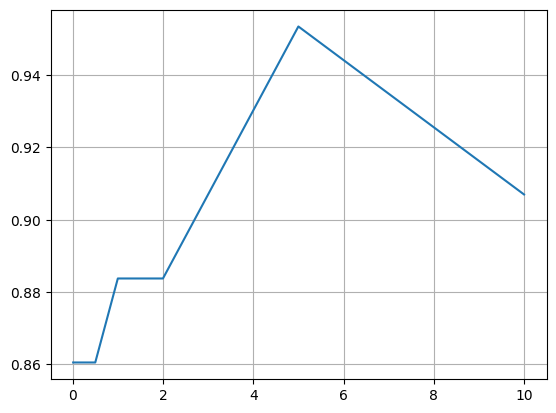

In [41]:
regularisation = [0.01, 0.1, 0.25, 0.5, 1.0, 2.0, 5.0, 10.0]
performance = []

for C in regularisation:
    svc = SVC(C=C, kernel='rbf')
    svc.fit(X_train, y_train)

    y_pred = svc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    performance.append(accuracy)

plt.plot(regularisation, performance)
plt.grid(True)

Choose the best C, which is 5.

In [42]:
svc=SVC(C=5, kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9535


### Evaluation Metrics

In [43]:
for i, pred in enumerate(y_pred):
    actual = y_test.iloc[i]
    print(f"Prediction Number: {i + 1}. Predicted: {pred}. Actual: {actual}")

Prediction Number: 1. Predicted: 0. Actual: 0
Prediction Number: 2. Predicted: 0. Actual: 0
Prediction Number: 3. Predicted: 0. Actual: 0
Prediction Number: 4. Predicted: 0. Actual: 0
Prediction Number: 5. Predicted: 0. Actual: 0
Prediction Number: 6. Predicted: 0. Actual: 0
Prediction Number: 7. Predicted: 0. Actual: 0
Prediction Number: 8. Predicted: 0. Actual: 0
Prediction Number: 9. Predicted: 0. Actual: 0
Prediction Number: 10. Predicted: 0. Actual: 0
Prediction Number: 11. Predicted: 0. Actual: 0
Prediction Number: 12. Predicted: 0. Actual: 0
Prediction Number: 13. Predicted: 1. Actual: 1
Prediction Number: 14. Predicted: 0. Actual: 0
Prediction Number: 15. Predicted: 0. Actual: 0
Prediction Number: 16. Predicted: 0. Actual: 0
Prediction Number: 17. Predicted: 0. Actual: 0
Prediction Number: 18. Predicted: 0. Actual: 0
Prediction Number: 19. Predicted: 0. Actual: 0
Prediction Number: 20. Predicted: 0. Actual: 0
Prediction Number: 21. Predicted: 0. Actual: 0
Prediction Number: 22.

In [44]:
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

print('Confusion matrix:', cm)

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

print('True Positives(TP) = ', TP)
print('True Negatives(TN) = ', TN)
print('False Positives(FP) = ', FP)
print('False Negatives(FN) = ', FN)

Confusion matrix: [[ 4  2]
 [ 0 37]]
True Positives(TP) =  4
True Negatives(TN) =  37
False Positives(FP) =  2
False Negatives(FN) =  0


<Axes: >

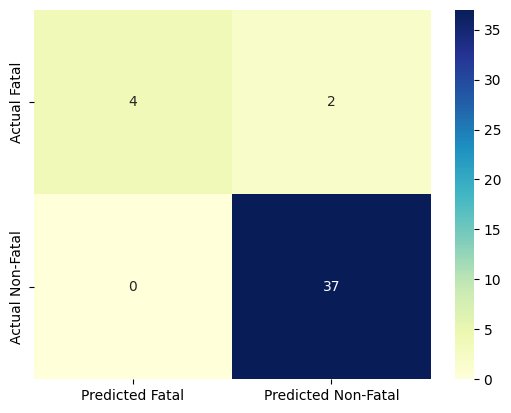

In [45]:
cm_matrix = pd.DataFrame(
    cm,
    index=['Actual Fatal', 'Actual Non-Fatal'],
    columns=['Predicted Fatal', 'Predicted Non-Fatal']
)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [46]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
specificity = TN / (TN + FP)
f1_score = (2 * precision * recall) / (precision + recall)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
print('Classification error : {0:0.4f}'.format(classification_error))
print('Precision : {0:0.4f}'.format(precision))
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
print('Specificity : {0:0.4f}'.format(specificity))
print('F1 Score : {0:0.4f}'.format(f1_score))

Classification accuracy : 0.9535
Classification error : 0.0465
Precision : 0.6667
Recall or Sensitivity : 1.0000
Specificity : 0.9487
F1 Score : 0.8000


### To-do: Cleanup cells below.

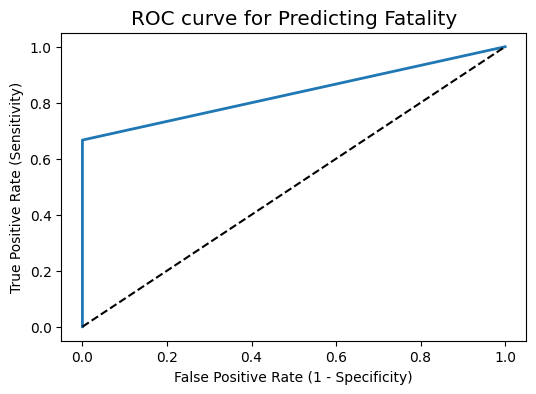

In [47]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting Fatality')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [48]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8333
